In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform
# warning
import warnings
warnings.filterwarnings("ignore")
# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [2]:
df_salaries = pd.read_csv('../data/ds_salaries.csv')
df_salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
# df_salaries.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df_salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
df_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [6]:
df_salaries.work_year = df_salaries.work_year.astype('object')

In [7]:
df_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    object
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(3), object(8)
memory usage: 52.3+ KB


In [8]:
df_salaries.describe()

,salary,salary_in_usd,remote_ratio
count,6.070000e+02,607.000000,607.00000
mean,3.240001e+05,112297.869852,70.92257
std,1.544357e+06,70957.259411,40.70913
min,4.000000e+03,2859.000000,0.00000
25%,7.000000e+04,62726.000000,50.00000
50%,1.150000e+05,101570.000000,100.00000
75%,1.650000e+05,150000.000000,100.00000
max,3.040000e+07,600000.000000,100.00000


In [9]:
df_salaries.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [10]:
# df_salaries.to_csv('../data/ds_salaries.csv', index=False)

In [11]:
df_salaries.company_size.value_counts()

M    326
L    198
S     83
Name: company_size, dtype: int64

> company_size를 타겟으로 쓰고싶다면, M과 나머지로 구분해서 사용하기

In [12]:
df_salaries.company_location.value_counts()

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: company_location, dtype: int64

> company_location을 타겟으로 쓰고싶다면, US와 나머지로 구분해서 사용하기 > 의미 없다.

In [77]:
df_salaries.job_title.value_counts()[:4].sum()

413

In [57]:
len(df_salaries.job_title.unique())

50

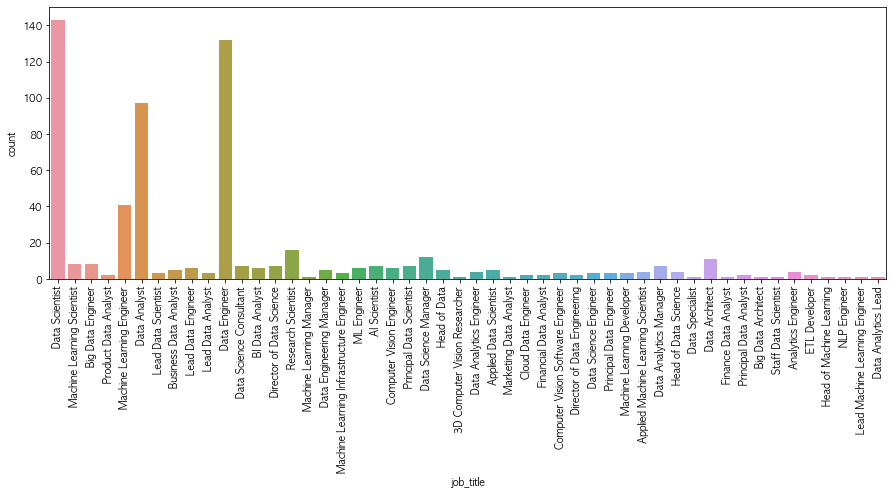

In [72]:
plt.figure(figsize=(15,5))
sns.countplot(df_salaries.job_title)
plt.xticks(rotation=90)
plt.show()

> job_title을 타겟으로 쓰고싶다면, data scientist와 data engineer만 뽑아서 사용하기

# one hot encoding : get_dummies

In [42]:
df_salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [52]:
df_drop = df_salaries.drop(['salary','salary_currency','employee_residence','company_location'], axis=1)

In [53]:
df_oh = pd.get_dummies(df_drop, ['work_year','experience_level','employment_type','job_title','company_size'])

,salary_in_usd,remote_ratio,work_year_2020,work_year_2021,work_year_2022,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,...,job_title_NLP Engineer,job_title_Principal Data Analyst,job_title_Principal Data Engineer,job_title_Principal Data Scientist,job_title_Product Data Analyst,job_title_Research Scientist,job_title_Staff Data Scientist,company_size_L,company_size_M,company_size_S
0,79833,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,260000,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,109024,50,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,20000,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,150000,50,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,154000,100,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
603,126000,100,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
604,129000,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
605,150000,100,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


# salary_in_usd : regression target test

In [14]:
sort_salary_usd = df_salaries.sort_values('salary_in_usd')
sort_salary_usd.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
176,2021,MI,FT,Data Scientist,58000,MXN,2859,MX,0,MX,S
185,2021,MI,FT,Data Engineer,4000,USD,4000,IR,100,IR,M
238,2021,EN,FT,Data Scientist,4000,USD,4000,VN,0,VN,M
77,2021,MI,PT,3D Computer Vision Researcher,400000,INR,5409,IN,50,IN,M
179,2021,MI,FT,Data Scientist,420000,INR,5679,IN,100,US,S


In [41]:
sort_salary_usd.salary_in_usd

176      2859
185      4000
238      4000
77       5409
179      5679
        ...  
225    416000
157    423000
97     450000
33     450000
252    600000
Name: salary_in_usd, Length: 607, dtype: int64

In [31]:
import numpy as np

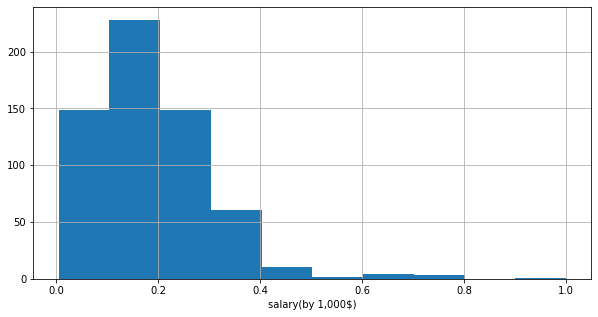

In [39]:
plt.figure(figsize=(10,5))
(sort_salary_usd['salary_in_usd']/1000).hist(
)
plt.xlabel('salary(by 1,000$)')

plt.show()

### Data Scientist 직종의 salary_in_usd만 히스토그램 그리기

In [18]:
dataScientist_salary = sort_salary_usd[sort_salary_usd['job_title']=='Data Scientist'].salary_in_usd

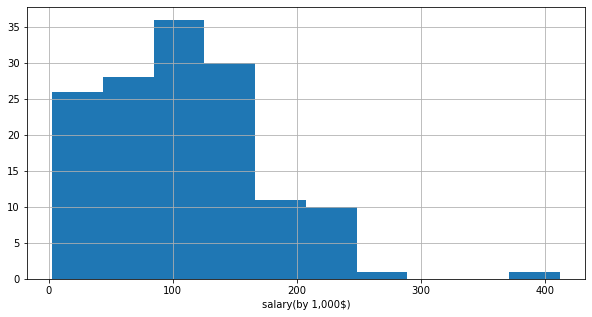

In [24]:
plt.figure(figsize=(10,5))
(dataScientist_salary/1000).hist(
)
plt.xlabel('salary(by 1,000$)')

plt.show()

In [20]:
df_salaries.work_year.value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

<Figure size 720x360 with 0 Axes>

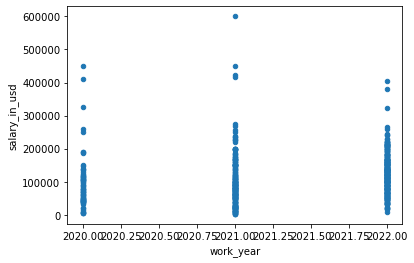

In [26]:
plt.figure(figsize=(10,5))
df_salaries.plot(
    kind='scatter',
    x='work_year',
    y='salary_in_usd',
)

plt.show()

In [25]:
import seaborn as sns

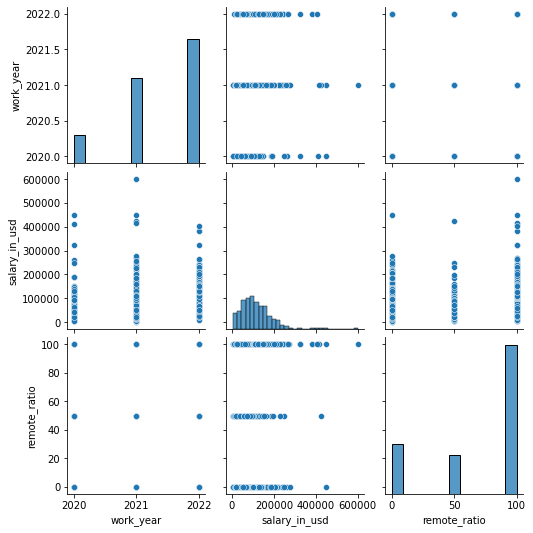

In [54]:
sns.pairplot(df_drop)

In [55]:
df_drop

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size
0,2020,MI,FT,Data Scientist,79833,0,L
1,2020,SE,FT,Machine Learning Scientist,260000,0,S
2,2020,SE,FT,Big Data Engineer,109024,50,M
3,2020,MI,FT,Product Data Analyst,20000,0,S
4,2020,SE,FT,Machine Learning Engineer,150000,50,L
...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,100,M
603,2022,SE,FT,Data Engineer,126000,100,M
604,2022,SE,FT,Data Analyst,129000,0,M
605,2022,SE,FT,Data Analyst,150000,100,M
